In [1]:
# Importing Modules

import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
class Decode:

    def dectobin(num):
        temp= bin(num).replace('0b','')
        while len(temp)<8:
            temp= '0' + temp
        return temp
    
    def bincodedimage(image):
        t= [[ ['#' for col in range(image.shape[2])] for col in range(image.shape[1])] for row in range(image.shape[0])]
        i= 0
        for _ in tqdm(range(image.shape[0])):
            if i >= image.shape[0]:
                break
            for j in range(image.shape[1]):
                t[i][j][0]= (Decode.dectobin(image[i][j][0]))
                t[i][j][1]= (Decode.dectobin(image[i][j][1]))
                t[i][j][2]= (Decode.dectobin(image[i][j][2]))
            i+=1
        return t
    
    def decodeimage(image):
        i= 0
        for _ in tqdm(range(len(image))):
            if i >= len(image):
                break
            for j in range(len(image[0])):
                image[i][j][0]= image[i][j][0][4:][::-1] + '0000'
                image[i][j][1]= image[i][j][1][4:][::-1] + '0000'
                image[i][j][2]= image[i][j][2][4:][::-1] + '0000'
            i+=1
        return image

    def backtodecimal(image):
        t= [[ [0 for col in range(3)] for col in range(len(image[0]))] for row in range(len(image))]
        i= 0
        for _ in tqdm(range(len(image))):
            if i >= len(image):
                break
            for j in range(len(image[0])):
                t[i][j][0]= int(image[i][j][0], 2)
                t[i][j][1]= int(image[i][j][1], 2)
                t[i][j][2]= int(image[i][j][2], 2)
            i+=1
        return t

In [3]:
def flowcontrolDecoder(m='secret.png'):
    secretImage= cv2.imread(m)
    binImage= Decode.bincodedimage(secretImage)
    decodedImage= Decode.decodeimage(binImage)
    hiddenImage= Decode.backtodecimal(decodedImage)
    return hiddenImage

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:04<00:00, 249.62it/s]


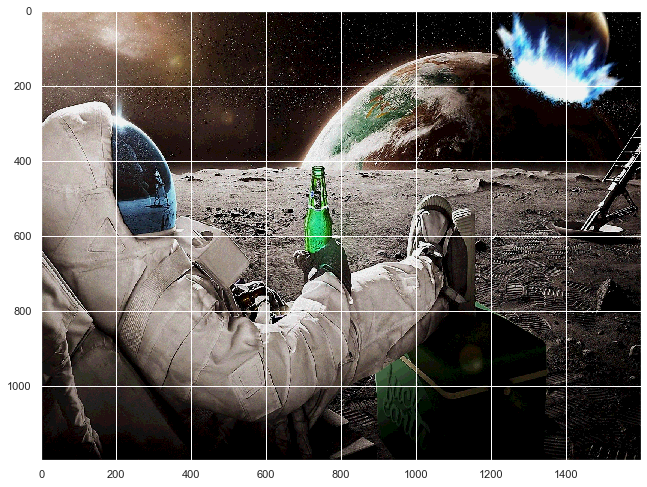

In [4]:
decode= flowcontrolDecoder(m='secret.png')
plt.imshow(decode)
plt.show()